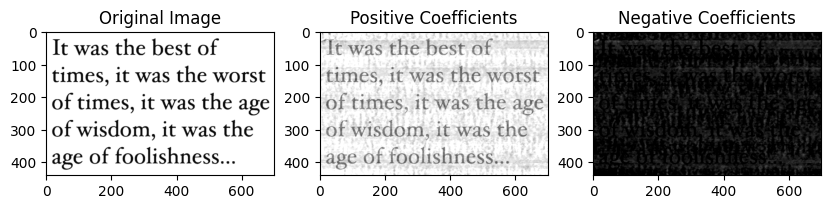

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)

    # Display the original, positive, and negative images
    plt.figure(figsize=(10, 4))
    plt.subplot(131)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(133)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.show()

# Example usage
image_path = '/content/test.png'  # Replace with the path to your image
extract_distortion(image_path)


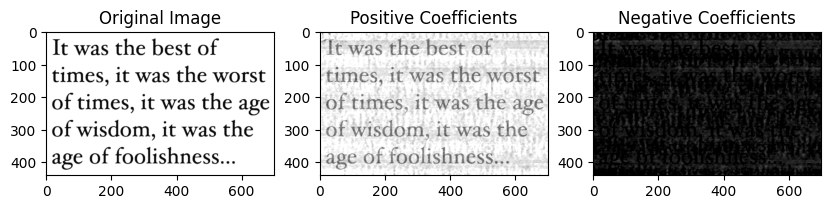

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)

    # Display the original, positive, and negative images
    plt.figure(figsize=(10, 4))
    plt.subplot(131)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(133)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.show()

# Example usage
image_path = 'test.png'  # Replace with the path to your image
extract_distortion(image_path)


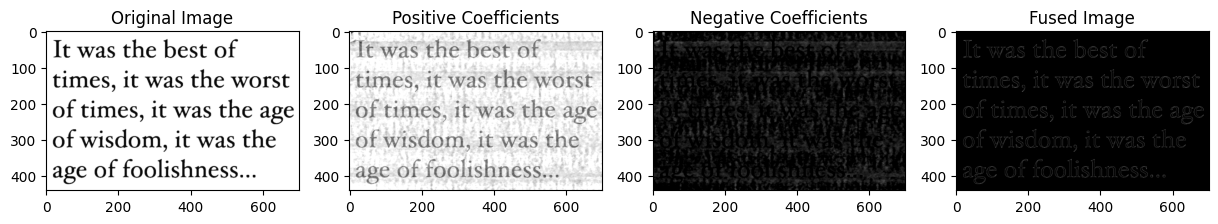

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = 'test.png'  # Replace with the path to your image
extract_distortion(image_path)


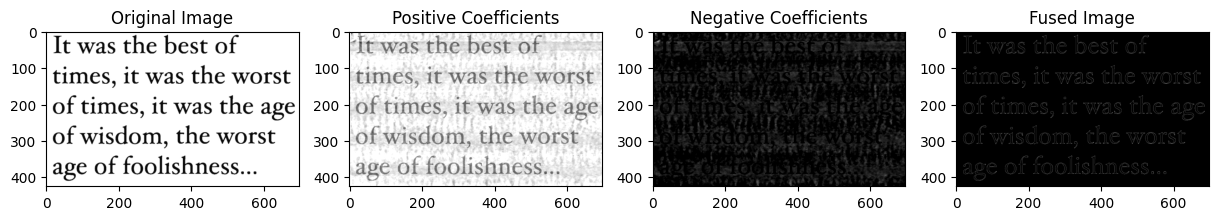

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = 'testf.png'  # Replace with the path to your image
extract_distortion(image_path)


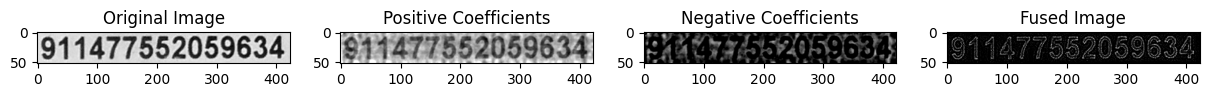

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = '013.jpg'  # Replace with the path to your image
extract_distortion(image_path)


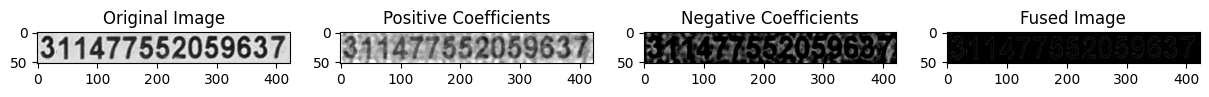

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = 'f013.jpg'  # Replace with the path to your image
extract_distortion(image_path)


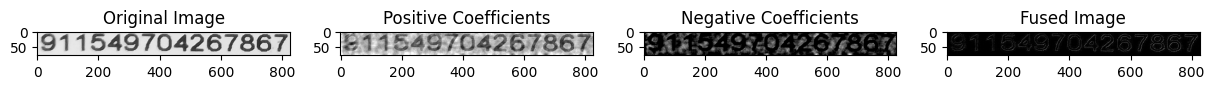

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = '053.jpg'  # Replace with the path to your image
extract_distortion(image_path)


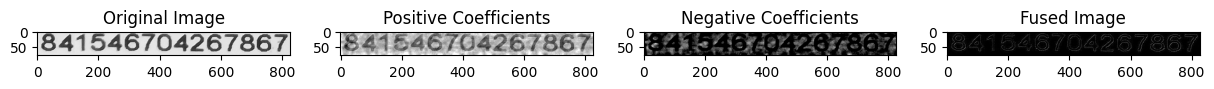

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = 'f053.jpg'  # Replace with the path to your image
extract_distortion(image_path)


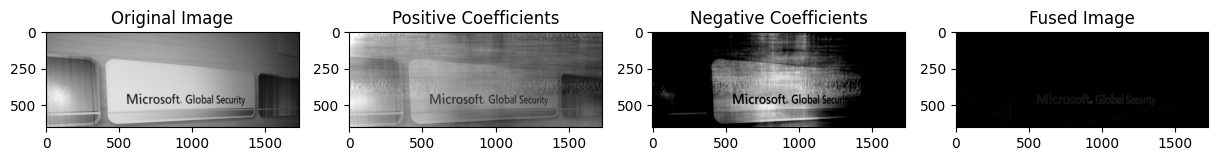

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = '/content/IMG_01.JPG'  # Replace with the path to your image
extract_distortion(image_path)


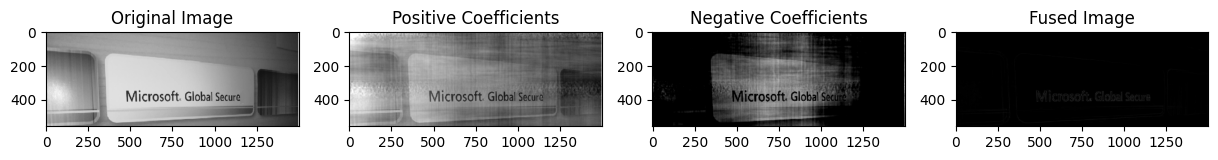

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1  # You may need to adjust this threshold based on your specific requirements

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, and fused images
    plt.figure(figsize=(15, 4))
    plt.subplot(141)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(143)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(144)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.show()

# Example usage
image_path = '/content/IMG_01_CP.jpg'  # Replace with the path to your image
extract_distortion(image_path)


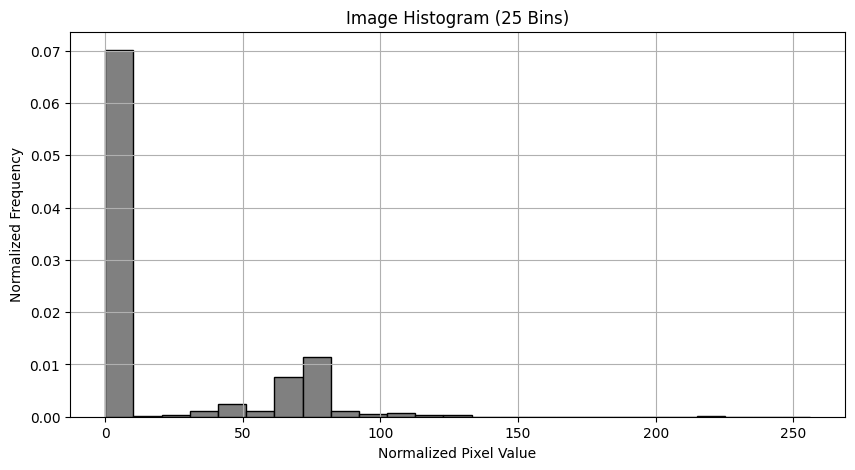

In [ ]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# # Upload image to Colab
# uploaded = files.upload()

# # Get the uploaded image file name
# image_filename = next(iter(uploaded))

# Load the input image
#image = cv2.imread(result_image, cv2.IMREAD_GRAYSCALE)

# Compute histogram with 25 bins
hist, bins = np.histogram(result_image.flatten(), bins=25, range=[0, 256], density=True)

# Calculate bin centers for x-axis ticks
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot the histogram with normalized values
plt.figure(figsize=(10, 5))
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), color='gray', edgecolor='black')
plt.title('Image Histogram (25 Bins)')
plt.xlabel('Normalized Pixel Value')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.show()



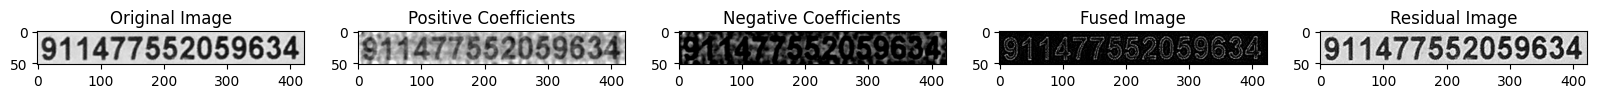

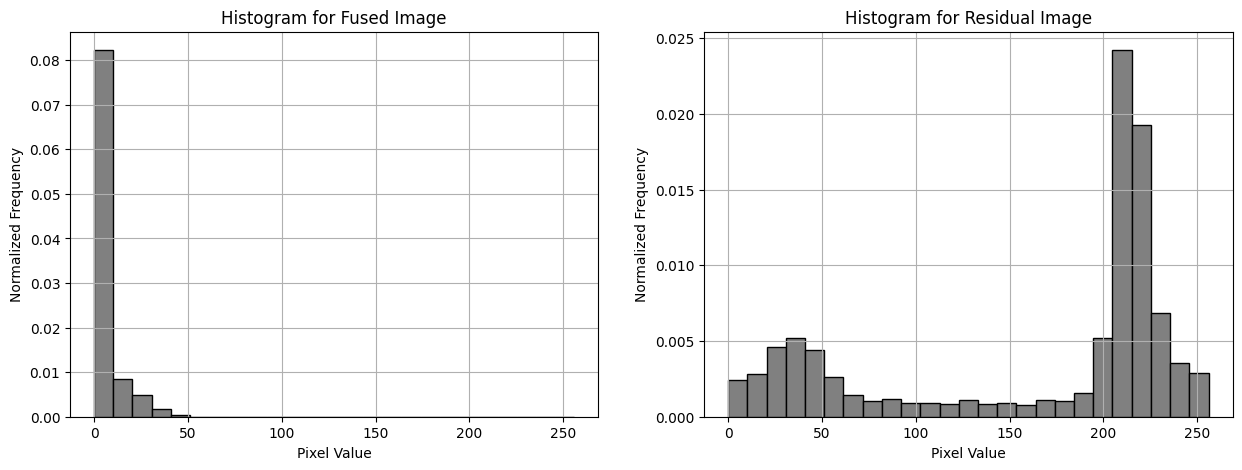

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(image):
    # Define the Laplacian filter
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian filter
    filtered_image = convolve(image, laplacian_kernel)

    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    # Compute the variance of each image
    variance1 = np.var(image1)
    variance2 = np.var(image2)

    # Compute the adaptive weights
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1

    # Fuse the images based on the adaptive weights
    fused_image = weight1 * image1 + weight2 * image2

    return fused_image

def extract_distortion(image_path):
    # Load the original image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_array = np.array(original_image)

    # Apply 2D DCT to the original image
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Set a threshold for positive and negative coefficients
    threshold = 0.1

    # Extract positive and negative coefficients
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)

    # Reconstruct images using inverse DCT
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply Laplacian filtering
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)

    # Fuse Laplacian-filtered images based on adaptive weighted variance
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)

    # Generate residual image by subtracting fused image from the original image
    residual_image = original_array - fused_image

    # Convert float images to uint8 for display
    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)
    residual_image = np.clip(residual_image, 0, 255).astype(np.uint8)

    # Display the original, positive, negative, fused, and residual images
    plt.figure(figsize=(20, 4))

    plt.subplot(151)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(152)
    plt.imshow(positive_image, cmap='gray')
    plt.title('Positive Coefficients')

    plt.subplot(153)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Coefficients')

    plt.subplot(154)
    plt.imshow(fused_image, cmap='gray')
    plt.title('Fused Image')

    plt.subplot(155)
    plt.imshow(residual_image, cmap='gray')
    plt.title('Residual Image')

    plt.show()

    # Plot histograms for the fused and residual images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.hist(fused_image.flatten(), bins=25, range=[0, 256], density=True, color='gray', edgecolor='black')
    plt.title('Histogram for Fused Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(residual_image.flatten(), bins=25, range=[0, 256], density=True, color='gray', edgecolor='black')
    plt.title('Histogram for Residual Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.grid(True)

    plt.show()

# Example usage
image_path = '013.jpg'  # Replace with the path to your image
extract_distortion(image_path)


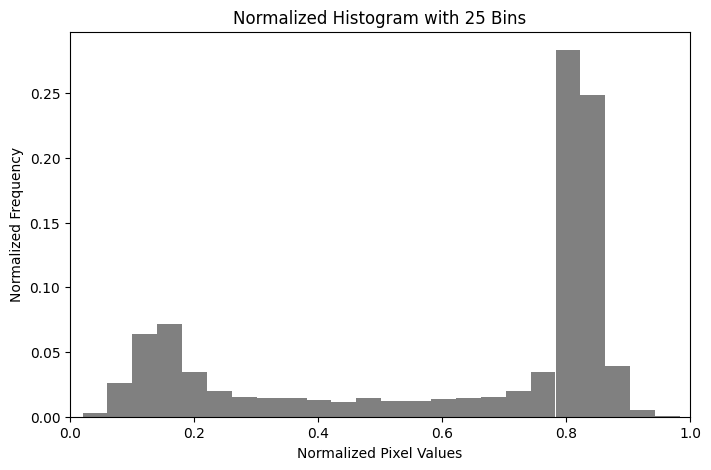

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the image (replace 'image_path' with your image file path)
image = cv2.imread('013.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate histogram with 25 bins and normalize pixel values
hist = cv2.calcHist([gray_image], [0], None, [25], [0, 256])
hist_normalized = hist / hist.sum()  # Normalize the histogram

# Calculate bin edges
bins = [i * 256 / 25 for i in range(26)]

# Normalize the bin edges to range from 0 to 1
bins_normalized = [i / 255 for i in bins]

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.bar(bins_normalized[:-1], hist_normalized.ravel(), width=0.04, color='gray')
plt.title('Normalized Histogram with 25 Bins')
plt.xlabel('Normalized Pixel Values')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 1])
plt.show()


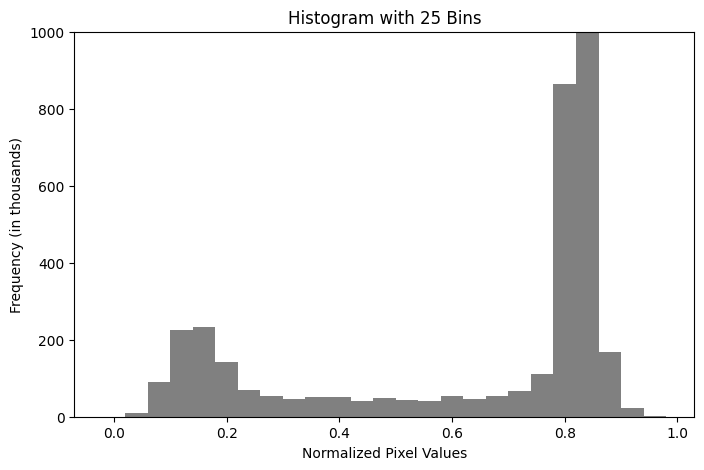

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (replace 'image_path' with your image file path)
image = cv2.imread('013.jpg')

# Convert the image to grayscale and normalize pixel values to range [0, 1]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
normalized_image = gray_image / 255.0

# Calculate histogram with 25 bins
hist, bins = np.histogram(normalized_image.flatten(), bins=25, range=(0, 1))

# Define a factor to scale the histogram values into the range of thousands
scaling_factor = 1000

# Normalize the histogram to the range of thousands
hist_normalized = hist * scaling_factor / hist.max()

# Calculate bin edges
bin_edges = np.linspace(0, 1, 26)  # 26 edges for 25 bins
accuracy=0.7745

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.bar(bin_edges[:-1], hist_normalized, width=0.04, color='gray')
plt.title('Histogram with 25 Bins')
plt.xlabel('Normalized Pixel Values')
plt.ylabel('Frequency (in thousands)')
plt.ylim([0, scaling_factor])  # Set y-axis range to the scaling factor
plt.show()


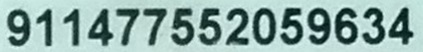

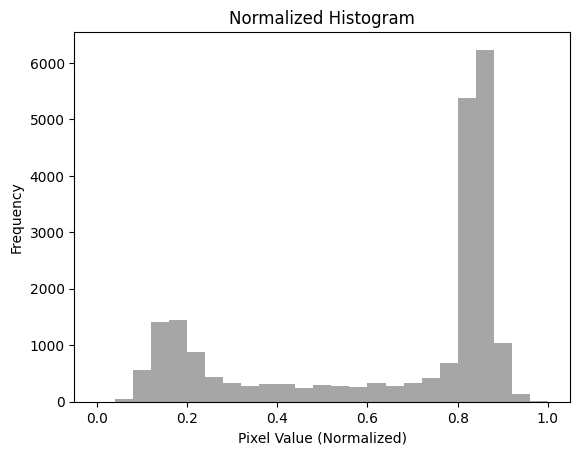

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Import the cv2_imshow function

def plot_normalized_histogram(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values to the range 0-1
    normalized_image = gray_image / 255.0

    # Flatten the 2D array to 1D
    flattened_image = normalized_image.flatten()

    # Plot the normalized histogram with 25 bins
    plt.hist(flattened_image, bins=25, range=[0, 1], color='gray', alpha=0.7)
    plt.title('Normalized Histogram')
    plt.xlabel('Pixel Value (Normalized)')
    plt.ylabel('Frequency')
    plt.show()

# Load your image
image_path = '013.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Display the original image using cv2_imshow
cv2_imshow(image)

# Plot and display the normalized histogram with 25 bins
plot_normalized_histogram(image)

In [4]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def laplacian_filter(image):
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    filtered_image = convolve(image, laplacian_kernel)
    return filtered_image

def adaptive_weighted_variance_fusion(image1, image2):
    variance1 = np.var(image1)
    variance2 = np.var(image2)
    weight1 = variance2 / (variance1 + variance2)
    weight2 = 1 - weight1
    fused_image = weight1 * image1 + weight2 * image2
    return fused_image

def plot_normalized_histogram(image, title):
    normalized_image = image / 255.0
    flattened_image = normalized_image.flatten()
    plt.hist(flattened_image, bins=25, range=[0, 1], color='gray', alpha=0.7)
    plt.title(f'Normalized Histogram - {title}')
    plt.xlabel('Pixel Value (Normalized)')
    plt.ylabel('Frequency')
    plt.show()

def extract_distortion(image_path):
    original_image = Image.open(image_path).convert('L')
    original_array = np.array(original_image)
    dct_coeffs = dct(dct(original_array, axis=0, norm='ortho'), axis=1, norm='ortho')
    threshold = 0.1
    positive_coeffs = np.where(dct_coeffs > threshold, dct_coeffs, 0)
    negative_coeffs = np.where(dct_coeffs < -threshold, dct_coeffs, 0)
    positive_image = idct(idct(positive_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    negative_image = idct(idct(negative_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho')
    laplacian_positive = laplacian_filter(positive_image)
    laplacian_negative = laplacian_filter(negative_image)
    fused_image = adaptive_weighted_variance_fusion(laplacian_positive, laplacian_negative)
    residual_image = original_array - fused_image

    positive_image = np.clip(positive_image, 0, 255).astype(np.uint8)
    negative_image = np.clip(negative_image, 0, 255).astype(np.uint8)
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)
    residual_image = np.clip(residual_image, 0, 255).astype(np.uint8)

    # plt.figure(figsize=(20, 4))
    # plt.subplot(151)
    # plt.imshow(original_array, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(152)
    # plt.imshow(positive_image, cmap='gray')
    # plt.title('Positive Coefficients')

    # plt.subplot(153)
    # plt.imshow(negative_image, cmap='gray')
    # plt.title('Negative Coefficients')

    # plt.subplot(154)
    # plt.imshow(fused_image, cmap='gray')
    # plt.title('Fused Image')

    # plt.subplot(155)
    # plt.imshow(residual_image, cmap='gray')
    # plt.title('Residual Image')
    # plt.show()

    # Extract histograms and concatenate into feature vectors
    fused_hist = np.histogram(fused_image.flatten(), bins=25, range=[0, 256], density=True)[0]
    residual_hist = np.histogram(residual_image.flatten(), bins=25, range=[0, 256], density=True)[0]

    # Concatenate feature vectors
    feature_vector = np.concatenate((fused_hist, residual_hist))

    return feature_vector

# Example usage
image_path = '013.jpg'
feature_vector = extract_distortion(image_path)
print("Feature Vector:", feature_vector)

Feature Vector: [8.22814731e-02 8.53315660e-03 4.81710453e-03 1.67821706e-03
 3.24100120e-04 2.21986384e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.40633240e-03 2.85030517e-03 4.60843733e-03
 5.20336084e-03 4.37757149e-03 2.60612015e-03 1.44291150e-03
 1.06109491e-03 1.19872647e-03 9.05704446e-04 8.87945536e-04
 8.43548259e-04 1.08773328e-03 8.52427714e-04 9.05704446e-04
 7.54753705e-04 1.10993192e-03 1.01669764e-03 1.55834441e-03
 5.19892111e-03 2.42187145e-02 1.92950565e-02 6.83274090e-03
 3.54290269e-03 2.89026272e-03]


In [ ]:
feature_vector.shape

(50,)

Motivated by the strength of discriminative power of deep neural networks, the
extracted 50 feature vectors are passed to the neural network for detecting altered text in document images. In this architecture, we use ReLU activation function for all the layers along with a dropout rate of 0.2, except the final layer where we use Sigmoid activation. Batch Normalization (BN) is also used in each intermediate layer, which helps train the model faster and better
weights initialization. With Adam as an optimizer and learning rate of 0.01 and binary cross entropy loss function, the proposed architecture is trained for 100 epochs with the batch size of 8 (N = 8).
The dataset is divided into 80% and 20% for training and testing. the loss function is binary cross entropy loss used for the classification of altered text in the PDF document images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import numpy as np
import tensorflow as tf
from scipy.fftpack import dct, idct
from scipy.ndimage import convolve
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Path to your dataset folders
real_images_folder = '/content/drive/MyDrive/Mobile IMEI dataset/Original'
forged_images_folder = '/content/drive/MyDrive/Mobile IMEI dataset/Forged'

# Labeling the dataset
data = []
labels = []

for filename in os.listdir(real_images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust for image formats
        image_path = os.path.join(real_images_folder, filename)
        feature_vector = extract_distortion(image_path)
        data.append(feature_vector)
        labels.append(0)  # Assuming 0 represents real images

for filename in os.listdir(forged_images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust for image formats
        image_path = os.path.join(forged_images_folder, filename)
        feature_vector = extract_distortion(image_path)
        data.append(feature_vector)
        labels.append(1)  # Assuming 1 represents forged images

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data)
print(labels)
# Splitting the dataset into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Defining the neural network model
model = Sequential()

# Adding Batch Normalization and Dense layers with ReLU activation
model.add(Dense(128, input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.2))

# Output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Evaluating model on test data
loss_, accuracy_ = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


[[9.74037792e-02 2.49840943e-04 2.62990467e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.53837719e-02 8.59928517e-03 6.82012272e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.52383099e-02 6.75187443e-03 3.39829441e-03 ... 7.60144803e-03
  7.33316163e-03 2.81700721e-02]
 ...
 [7.50064850e-02 1.85966492e-03 1.47819519e-03 ... 1.19209290e-03
  5.76972961e-03 6.00337982e-02]
 [7.22046211e-02 8.53387950e-03 4.53362349e-03 ... 9.33393070e-04
  7.00044803e-04 1.73344427e-03]
 [8.23543773e-02 2.23316866e-03 1.85977711e-03 ... 9.62201287e-04
  1.10581342e-03 8.25051700e-03]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [6]:
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 77.45%
